In [1]:
import argparse
import pdb

from builder import build
from util import DEFAULTS

In [2]:
# Parse arguments
parser = argparse.ArgumentParser(description='Arguments for building a model that satisfies a set of geometry constraints')

# General arguments
parser.add_argument('--problem', '-p', action='store', type=str, help='Name of the file defining the set of constraints')
parser.add_argument('--dir', '-d', action='store', type=str, help='Directory containing problem files.')
parser.add_argument('--regularize_points', action='store', dest='regularize_points', type=float, default=DEFAULTS["regularize_points"])
parser.add_argument('--make_distinct', action='store', dest='make_distinct', type=float, default=DEFAULTS["make_distinct"])
parser.add_argument('--distinct_prob', action='store', dest='distinct_prob', type=float, default=DEFAULTS["distinct_prob"])
parser.add_argument('--min_dist', action='store', dest='min_dist', type=float, default=DEFAULTS["min_dist"])
parser.add_argument('--ndg_loss', action='store', dest='ndg_loss', type=float, default=DEFAULTS["ndg_loss"])

parser.add_argument('--n_models', action='store', dest='n_models', type=int, default=DEFAULTS['n_models'])
parser.add_argument('--n_tries', action='store', dest='n_tries', type=int, default=DEFAULTS['n_tries'])
parser.add_argument('--n_inits', action='store', dest='n_inits', type=int, default=DEFAULTS['n_inits'])
parser.add_argument('--verbosity', action='store', dest='verbosity', type=int, default=DEFAULTS['verbosity'])
parser.add_argument('--enforce_goals', dest='enforce_goals', action='store_true')
parser.add_argument('--plot_freq', action='store', dest='plot_freq', type=int, default=DEFAULTS['plot_freq'])
parser.add_argument('--loss_freq', action='store', dest='loss_freq', type=int, default=DEFAULTS['loss_freq'])
parser.add_argument('--losses_freq', action='store', dest='losses_freq', type=int, default=DEFAULTS['losses_freq'])

parser.add_argument('--unnamed_objects', dest='unnamed_objects', action='store_true')
parser.add_argument('--no_unnamed_objects', dest='unnamed_objects', action='store_false')
parser.set_defaults(unnamed_objects=True)

# Tensorflow arguments
parser.add_argument('--learning_rate', action='store', dest='learning_rate', type=float, default=DEFAULTS["learning_rate"])
parser.add_argument('--decay_steps', action='store', dest='decay_steps', type=float, default=DEFAULTS["decay_steps"])
parser.add_argument('--decay_rate', action='store', dest='decay_rate', type=float, default=DEFAULTS["decay_rate"])
parser.add_argument('--n_iterations', action='store', dest='n_iterations', type=int, default=DEFAULTS["n_iterations"])
parser.add_argument('--eps', action='store', dest='eps', type=float, default=DEFAULTS["eps"])

parser.add_argument('--experiment', dest='experiment', action='store_true')

parser.add_argument("--f", type=str, default='abc.def')


args = parser.parse_args()
args = vars(args)

In [171]:
args['problem'] = 'example_test.smt2'

args['n_tries'] = 10
args['eps'] = 3e-4

lines = open(args['problem'], 'r').readlines()
args['lines'] = lines
lines

['(param O point)\n',
 '(param A point)\n',
 '(define Gamma circle (coa O A)) ; Gamma是以O为圆心，经过A的圆，半径是OA的长度\n',
 '(assert (= (dist O A) 5)) ; 设定半径为5\n',
 '(param B point (on-circ Gamma)) ; B在圆Gamma上\n',
 '(define M point (midp A B)) ; M是AB的中点\n',
 '(assert (= (dist O M) 3)) ; OM=3\n',
 '(eval (= (dist A B) 8)) ; 验证AB=8']

In [172]:
# lines = [
#     '(param (A B C D) polygon)',
#     '(param C1 circle)',
#     '(define L1 line (reflect-ll (line C D) (line A B)))',
#     '(param F point (in-poly A B C D))',
#     '(param G point (on-line L1))',
#     '(define H point (inter-lc L1 C1 (rs-closer-to-p A)))',

#     # '(param A point)',
#     # '(param B point)',
#     # '(param C point)',
#     # #'(param C1 circle)',
#     # '(define D point (excenter A B C))',
#     # '(define C2 circle (excircle A B C))',
#     # '(define C1 circle (circumcircle A B C))',
#     # #'(define L1 line (connecting A B))\n',
#     # #'(eval (coll A B C))'

#     # '(param A point)',
#     # '(param B point)',
#     # '(define L1 line (line A B))',

# ]
# args['lines'] = lines

In [173]:
#args['dir'] = '../test_new_functions'

Processing instructions...: 100%|██████████| 8/8 [00:00<00:00, 57.81it/s]

INPUT INSTRUCTIONS:
parameterize O coords
parameterize A coords
define Gamma ((coa O A))
assert (eq-n (dist O A) 5.0)
parameterize B (on-circ Gamma)
define M ((midp A B))
assert (eq-n (dist O M) 3.0)
eval (eq-n (dist A B) 8.0)



Sampling initializations...: 100%|██████████| 10/10 [00:09<00:00,  1.04it/s]


[     0]  13.795074539903 ||   0.100000
======== Print losses ==========
-- Losses --
  eq-n_(dist O A)_5.0                                10.7760735548
  eq-n_(dist O M)_3.0                                3.0190001108
  points                                             0.0000008743
  distinct                                           0.0000000000
-- Goals --
  eq-n_(dist A B)_8.0                                32.1675947250
-- NDGs --


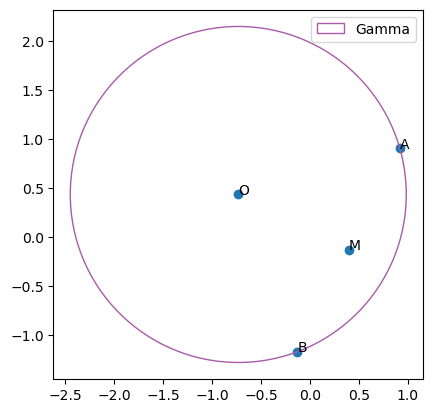

======== Print losses ==========
-- Losses --
  eq-n_(dist O A)_5.0                                0.0000041033
  eq-n_(dist O M)_3.0                                0.0000565978
  points                                             0.0000129129
  distinct                                           0.0000000000
-- Goals --
  eq-n_(dist A B)_8.0                                0.0000388925
-- NDGs --


Found 1 models


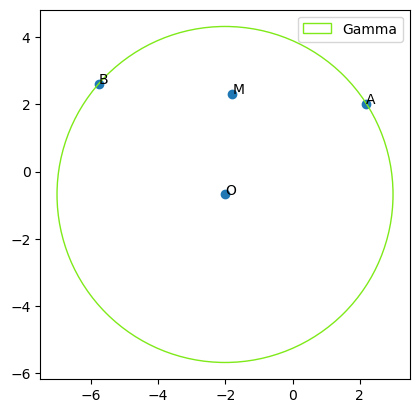

In [174]:
res = build(args)

In [17]:
for item in res[0]:
    print(item)

print('\n##############################################')

for item in res[1][0]:
    print(item)

;; 竞赛几何题：垂心对称点在外接圆上的性质

(param (A B C) acute-tri) ; 定义锐角三角形ABC

(define H point (orthocenter A B C)) ; H为垂心

(define M point (midp B C)) ; M为BC中点

(param D point) ; 定义自由点D

(assert (= (midp H D) M)) ; 约束D为H关于M的对称点

(define Gamma circle (circumcircle A B C)) ; 定义外接圆Gamma

(eval (on-circ D Gamma)) ; 验证D在外接圆上

##############################################
{<primitives.Point object at 0x000001D292B90550>: TfPoint(x=-0.4203581436731315, y=2.838658589240161), <primitives.Point object at 0x000001D292B908B0>: TfPoint(x=-2.0, y=0.0), <primitives.Point object at 0x000001D292B90820>: TfPoint(x=2.0, y=0.0), <primitives.Point object at 0x000001D292B90EE0>: TfPoint(x=-0.4203581436731317, y=1.3468682163962105), <primitives.Point object at 0x000001D292B903D0>: TfPoint(x=0.0, y=0.0), <primitives.Point object at 0x000001D2883D18E0>: TfPoint(x=0.4171581259706714, y=-1.3457968271026655)}
{}
{<primitives.Circle object at 0x000001D2883D1DF0>: CircleNF(center=TfPoint(x=2.2044684514802256e-16, y=0.7458951864

In [11]:
for obj_name, obj in res[1][0].named_points.items():
    print(obj_name)
    print(obj)
    (x, y) = obj

for obj_name, obj in res[1][0].named_lines.items():
    print(obj_name)
    print(obj)
    (x, y), r = obj
    # slope = y/x, intercept = r

for obj_name, obj in res[1][0].named_circles.items():
    print(obj_name)
    print(obj)
    (x, y), r = obj

A
(coords -0.420358 2.838659)
B
(coords -2.000000 0.000000)
C
(coords 2.000000 0.000000)
H
(coords -0.420358 1.346868)
M
(coords 0.000000 0.000000)
D
(coords 0.417158 -1.345797)
Gamma
CircleNF(center=TfPoint(x=2.2044684514802256e-16, y=0.745895186421975), radius=2.134563100291831)
